In [6]:
import pandas as pd
import matplotlib.pyplot as plot

f = 'SBAnational.csv'

df = pd.read_csv(f)

no_cols = len(df.columns)

no_rows = len(df)

print ('Number of rows: %s' %(no_rows))

print ('Number of columns: %s' %(no_cols))

print ('Data types for columns are:')

df.dtypes

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Number of rows: 899164
Number of columns: 27
Data types for columns are:


LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [53]:
df1 = df.dropna(axis = 0, how = 'any', subset = ['ChgOffDate'])

df2 = df1.loc[df1['MIS_Status'] == 'CHGOFF']

df2 = df2.copy()

special_chars = ['$', ',']


for x in special_chars:
    df2['ChgOffPrinGr'] = df2['ChgOffPrinGr'].str.replace(x, '')
    df2['DisbursementGross'] = df2['DisbursementGross'].str.replace(x, '')


df2['ChgOffPrinGr'] = df2['ChgOffPrinGr'].astype(float)

df2['DisbursementGross'] = df2['DisbursementGross'].astype(float)

df2['TotalJob'] = df2['CreateJob'] + df2['RetainedJob']

df2['PercentChgOff'] = df2['ChgOffPrinGr'] / df2['DisbursementGross'] * 100

df2.dtypes




LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross          object
MIS_Status            object
ChgOffPrinGr         float64
GrAppv                object
SBA_Appv              object
TotalJob               int64
PercentChgOff        float64
dtype: object

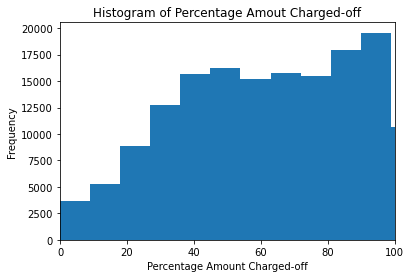

Average Charge-off Percentage: 61.919976
Standard dev: 27.040839


In [59]:
plot.hist(df2['PercentChgOff'], bins = 100)
plot.title('Histogram of Percentage Amout Charged-off')
plot.xlim(0, 100)
plot.xlabel('Percentage Amount Charged-off')
plot.ylabel('Frequency')

plot.show()

df2_mean = df2['PercentChgOff'].mean()

df2_std = df2['PercentChgOff'].std()

print ('Average Charge-off Percentage: %f' %(df2_mean))

print ('Standard dev: %f' %(df2_std))